# Amazon Pick Me

## Project Description/Outline
Analyzing best location selection based on labor force demographics, transportation infrastructure, living cost, and amenities near the site for the second Amazon headquarter on 8 of the 20 city finalists. 

## Research Questions to Answer
From corporate perspective which location is best cost effective.
From employee perspective which location is most recommended based on defining employee happiness as factor of weather, schools, traffic.


From the RFP:
In choosing the location for HQ2, Amazon has a preference for:

- Metropolitan areas with more than one million people
- A stable and business-friendly environment
- Urban or suburban locations with the potential to attract and retain strong technical talent
- Communities that think big and creatively when considering locations and real estate options


From the RFP:
In choosing the location for HQ2, Amazon has a preference for:

- Metropolitan areas with more than one million people
- A stable and business-friendly environment
- **Urban or suburban locations with the potential to attract and retain strong technical talent**
- Communities that think big and creatively when considering locations and real estate options

Team amazonians:
- Indu
- Helen
- Niyanti
- Guirlyn

### Data Sets to be Used
** 1st Category: Demographics** For Corporation 
- Team Member: Indu
- API: Census data

** 2nd Category: Transportation infrastructure ** For Employees                                                    
- Team Member: Helen
- API: Google search

** 3rd Category: Living Cost**  For Employees                                                                       
- Team Member: Guirlyn
- API: Census data

**4th Category: Large enterprises**  For Corporations
- Team Member: Niyati
- Google search

Criteras Demographics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sourceFile = pd.ExcelFile('Project1_AmazonSites.xlsx')
SitesDF=sourceFile.parse('AmazonSites') 
CitiesDf=sourceFile.parse('AmazonCities') 
CitiesDf=CitiesDf[['PlaceCode','StateCode']]

CensusFieldsDF=sourceFile.parse('CensusFields')
CensusFieldsMapDF = CensusFieldsDF[["Datafield","Category","CensusCode"]]
CensusFieldsDF = CensusFieldsDF[["Datafield","CensusCode"]]

#Converting the CensusFieldsDF into a dictionary.
dictCensusFields = CensusFieldsDF.set_index('CensusCode').to_dict()
dictCensusFields = dictCensusFields['Datafield']
censusDF= pd.read_csv("Cities_Demographics.csv")
#Get the fields for Labor Force
laborForceFields = CensusFieldsMapDF.loc[CensusFieldsMapDF['Category'] == 'Employment',["Datafield"]]
dictLaborForceFields = laborForceFields.set_index('Datafield').to_dict()
dictLaborForceFields = laborForceFields['Datafield']
dictLFFields = ['NAME']
for value in dictLaborForceFields.values:
    dictLFFields.append(value)
laborForceDF= censusDF.loc[:,dictLFFields]

laborForceDF['Emp_Tech'] = laborForceDF['Emp_Comp_Math_Female']+laborForceDF['Emp_Mgment_Occp_Female']+laborForceDF['Emp_Comp_Math_Male']+laborForceDF['Emp_Mgment_Occp_Male']

laborForceDF['Emp_Tech_Per']=(laborForceDF['Emp_Tech']/laborForceDF['Emp_Total'])*100
laborForceDF = laborForceDF[['NAME','Emp_Total','Emp_Tech','Emp_Tech_Per']]

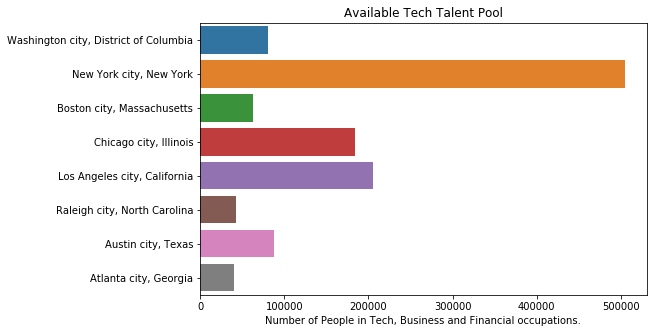

In [2]:


# Plotting Talent pool 
plt.figure(figsize=(8,5))
sns.barplot(y='NAME',x='Emp_Tech',data=laborForceDF)
plt.xlabel("Number of People in Tech, Business and Financial occupations.")
plt.ylabel("")
plt.title("Available Tech Talent Pool")
plt.show()

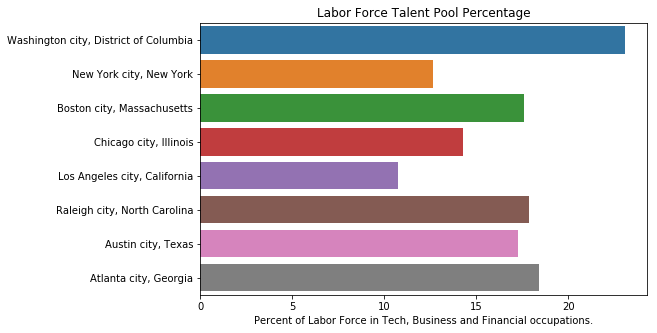

In [3]:
plt.figure(figsize=(8,5))

sns.barplot(y='NAME',x='Emp_Tech_Per',data=laborForceDF)
plt.xlabel("Percent of Labor Force in Tech, Business and Financial occupations.")
plt.ylabel("")
plt.title("Labor Force Talent Pool Percentage")
plt.show()

Criteria Transportation

Criteria Living Cost


In [4]:
housing_df=pd.read_csv("housing.csv")
housing_df_temp_own = housing_df.copy()
housing_df_temp_rent = housing_df.copy()
housing_df_temp_own['RentOwn'] = 'own'
housing_df_temp_own['Afford'] = housing_df_temp_own['home owner afford']
housing_df_temp_rent['RentOwn'] = 'rent'
housing_df_temp_rent['Afford'] = housing_df_temp_own['rent afford']
frames= [housing_df_temp_own, housing_df_temp_rent]
housing_df_rentOwn = pd.concat(frames, ignore_index= 'True')

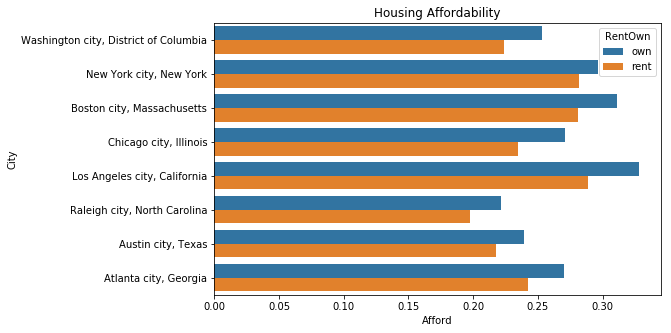

In [5]:
#By City
plt.figure(figsize=(8,5))
sns.barplot(x="Afford", y="City", hue="RentOwn", data=housing_df_rentOwn)
plt.title("Housing Affordability")

plt.show()

In [6]:
# read sites 
xls = pd.ExcelFile('Project1_AmazonSites.xlsx') 
sites_df=xls.parse('AmazonSites', dtype=str) 
schools_df = pd.read_csv("Schools.csv")
schools_df['Rating'] = schools_df['Rating'].astype(float)
avg_rating = pd.DataFrame(schools_df.groupby('Site Name')['Rating'].mean())
avg_rating = avg_rating.reset_index()
avg_rating = avg_rating.sort_values('Rating', ascending=False)

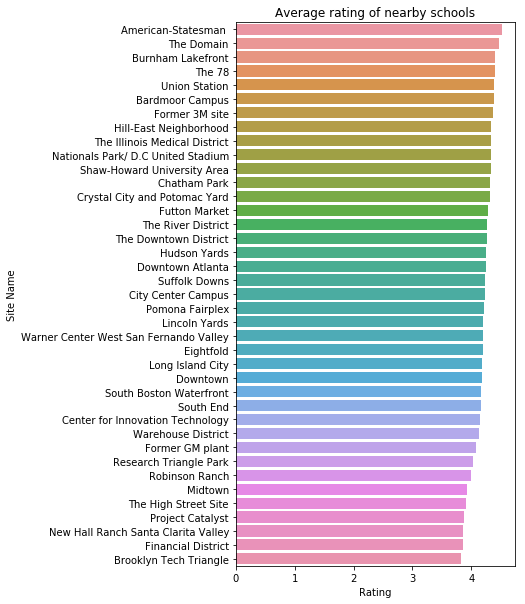

In [7]:
plt.figure(figsize=(5,10))
sns.barplot(x='Rating',y='Site Name',data=avg_rating)
plt.title("Average rating of nearby schools")
plt.show()

In [8]:
#reduce to cities
cities = sites_df[['Amazon City', 'Site Name']]
cities = cities.merge(avg_rating)
cities = cities.sort_values('Rating', ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))

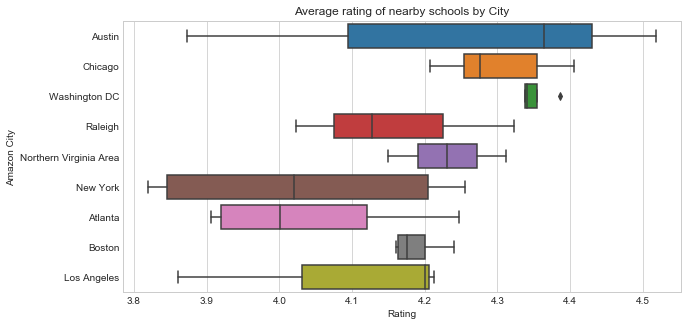

In [9]:
# Nearby schools average ratings
sns.boxplot(x='Rating',y='Amazon City',data=cities)
plt.title("Average rating of nearby schools by City")
plt.savefig("ratingsschoolscity.png")
plt.show()

In [10]:
schools_df = pd.read_csv("Colleges.csv")
num_colleges= schools_df.groupby('Site Name')['Schools'].count()
nc= pd.DataFrame(num_colleges)
nc = nc.reset_index()
nc = nc.sort_values('Schools')

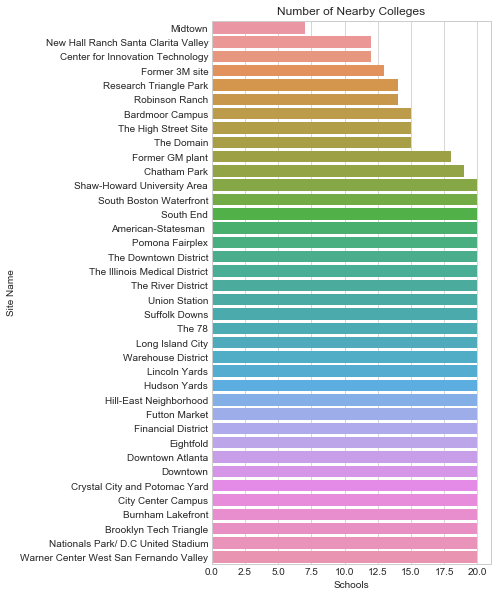

In [11]:
# Nearby Colleges average ratings
plt.figure(figsize=(5,10))
sns.barplot(x='Schools',y='Site Name',data=nc)
plt.title("Number of Nearby Colleges")
plt.savefig("nerbycolleges.png")
plt.show()

In [12]:
#reduce to cities
schools_df['Rating'] = schools_df['Rating'].astype(float)
m = schools_df.groupby('Site Name')['Rating'].mean()
am = pd.DataFrame(m)
am = am.reset_index()
am = am.sort_values('Rating', ascending=False)
cities = sites_df[['Amazon City', 'Site Name']]
cities = cities.merge(am)
cities = cities.sort_values('Rating', ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))

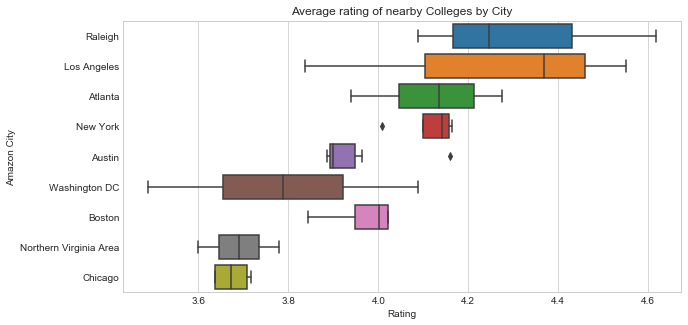

In [13]:
# Nearby Colleges average ratings
sns.boxplot(x='Rating',y='Amazon City',data=cities)
plt.title("Average rating of nearby Colleges by City")
plt.show()

Thank you